In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib as mpl
mpl.rcParams['figure.dpi']=300

In [2]:
adata = sc.read_h5ad('sce_ZF_sampleIntegration_2022-02-02_noCounts.h5ad')

In [3]:
adata.obs

,cell,Sample,Barcode,Tissue,condition,post.surgery,cluster_k50,cluster_k100,cluster_k150,cluster_k200,...,EpiCardMix_kk50,M0Only_k10,M0Only_k20,M0Only_k50,M0_k50_cl9.15k10,M0_k50_cl9.15k20,M0_k50_cl9.15k50,EpiCardMix_kk10.y,EpiCardMix_kk20.y,EpiCardMix_kk50.y
AAACCCAAGAGGGCGA_1dpi.Heart.1,AAACCCAAGAGGGCGA_1dpi.Heart.1,1dpi-Heart-1,AAACCCAAGAGGGCGA-1,Heart,injury,dpi1,2,14,4,13,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AAACCCAAGGCTCCCA_1dpi.Heart.1,AAACCCAAGGCTCCCA_1dpi.Heart.1,1dpi-Heart-1,AAACCCAAGGCTCCCA-1,Heart,injury,dpi1,2,14,4,13,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AAACCCACAATGCAGG_1dpi.Heart.1,AAACCCACAATGCAGG_1dpi.Heart.1,1dpi-Heart-1,AAACCCACAATGCAGG-1,Heart,injury,dpi1,11,9,9,7,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AAACCCACATCCTTCG_1dpi.Heart.1,AAACCCACATCCTTCG_1dpi.Heart.1,1dpi-Heart-1,AAACCCACATCCTTCG-1,Heart,injury,dpi1,15,8,8,5,...,NA,NA,NA,NA,10,4,4,NA,NA,NA
AAACCCATCCCTCTCC_1dpi.Heart.1,AAACCCATCCCTCTCC_1dpi.Heart.1,1dpi-Heart-1,AAACCCATCCCTCTCC-1,Heart,injury,dpi1,2,14,4,13,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ctrl-WKM-2TTTGGTTCACACACGC,Ctrl-WKM-2TTTGGTTCACACACGC,Ctrl-WKM-2,TTTGGTTCACACACGC-1,WKM,ctrl,ctrl,9,8,8,5,...,NA,NA,NA,NA,11,1,1,NA,NA,NA
Ctrl-WKM-2TTTGGTTCATTGTACG,Ctrl-WKM-2TTTGGTTCATTGTACG,Ctrl-WKM-2,TTTGGTTCATTGTACG-1,WKM,ctrl,ctrl,4,4,5,11,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Ctrl-WKM-2TTTGTTGAGGGTAGCT,Ctrl-WKM-2TTTGTTGAGGGTAGCT,Ctrl-WKM-2,TTTGTTGAGGGTAGCT-1,WKM,ctrl,ctrl,4,4,5,11,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Ctrl-WKM-2TTTGTTGCACCCAACG,Ctrl-WKM-2TTTGTTGCACCCAACG,Ctrl-WKM-2,TTTGTTGCACCCAACG-1,WKM,ctrl,ctrl,9,8,8,5,...,NA,NA,NA,NA,13,1,1,NA,NA,NA


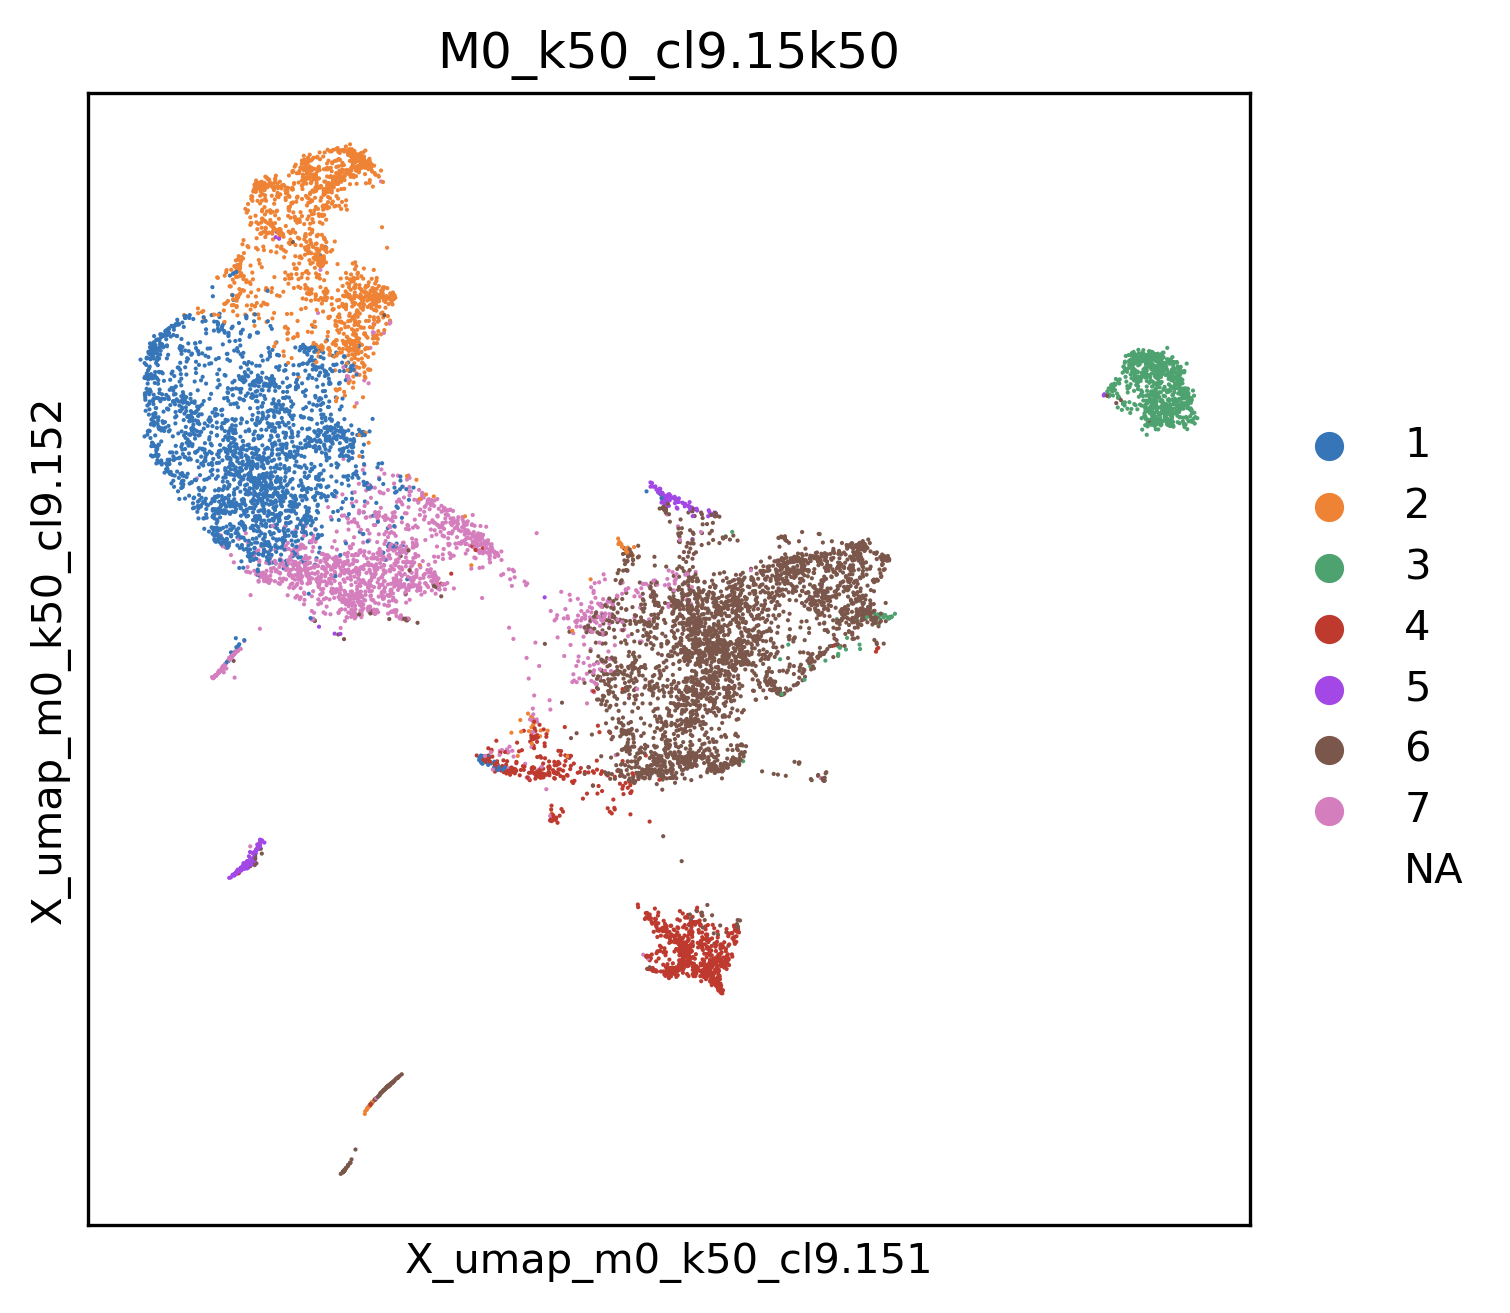

In [4]:
colors = {
    '1': '#3676B8', 
    '2': '#EF8335', 
    '3': '#4EA26F',
    '4': '#BE3A2F', 
    '5': '#A348E6',  
    '6': '#7B564B',  
    '7': '#D57EBE',  
    'NA': "white"
}

fig, ax = plt.subplots(figsize=(5,5))
sc.pl.embedding(adata, basis='X_umap_m0_k50_cl9.15', ax=ax, color='M0_k50_cl9.15k50',  palette=colors, size=4)

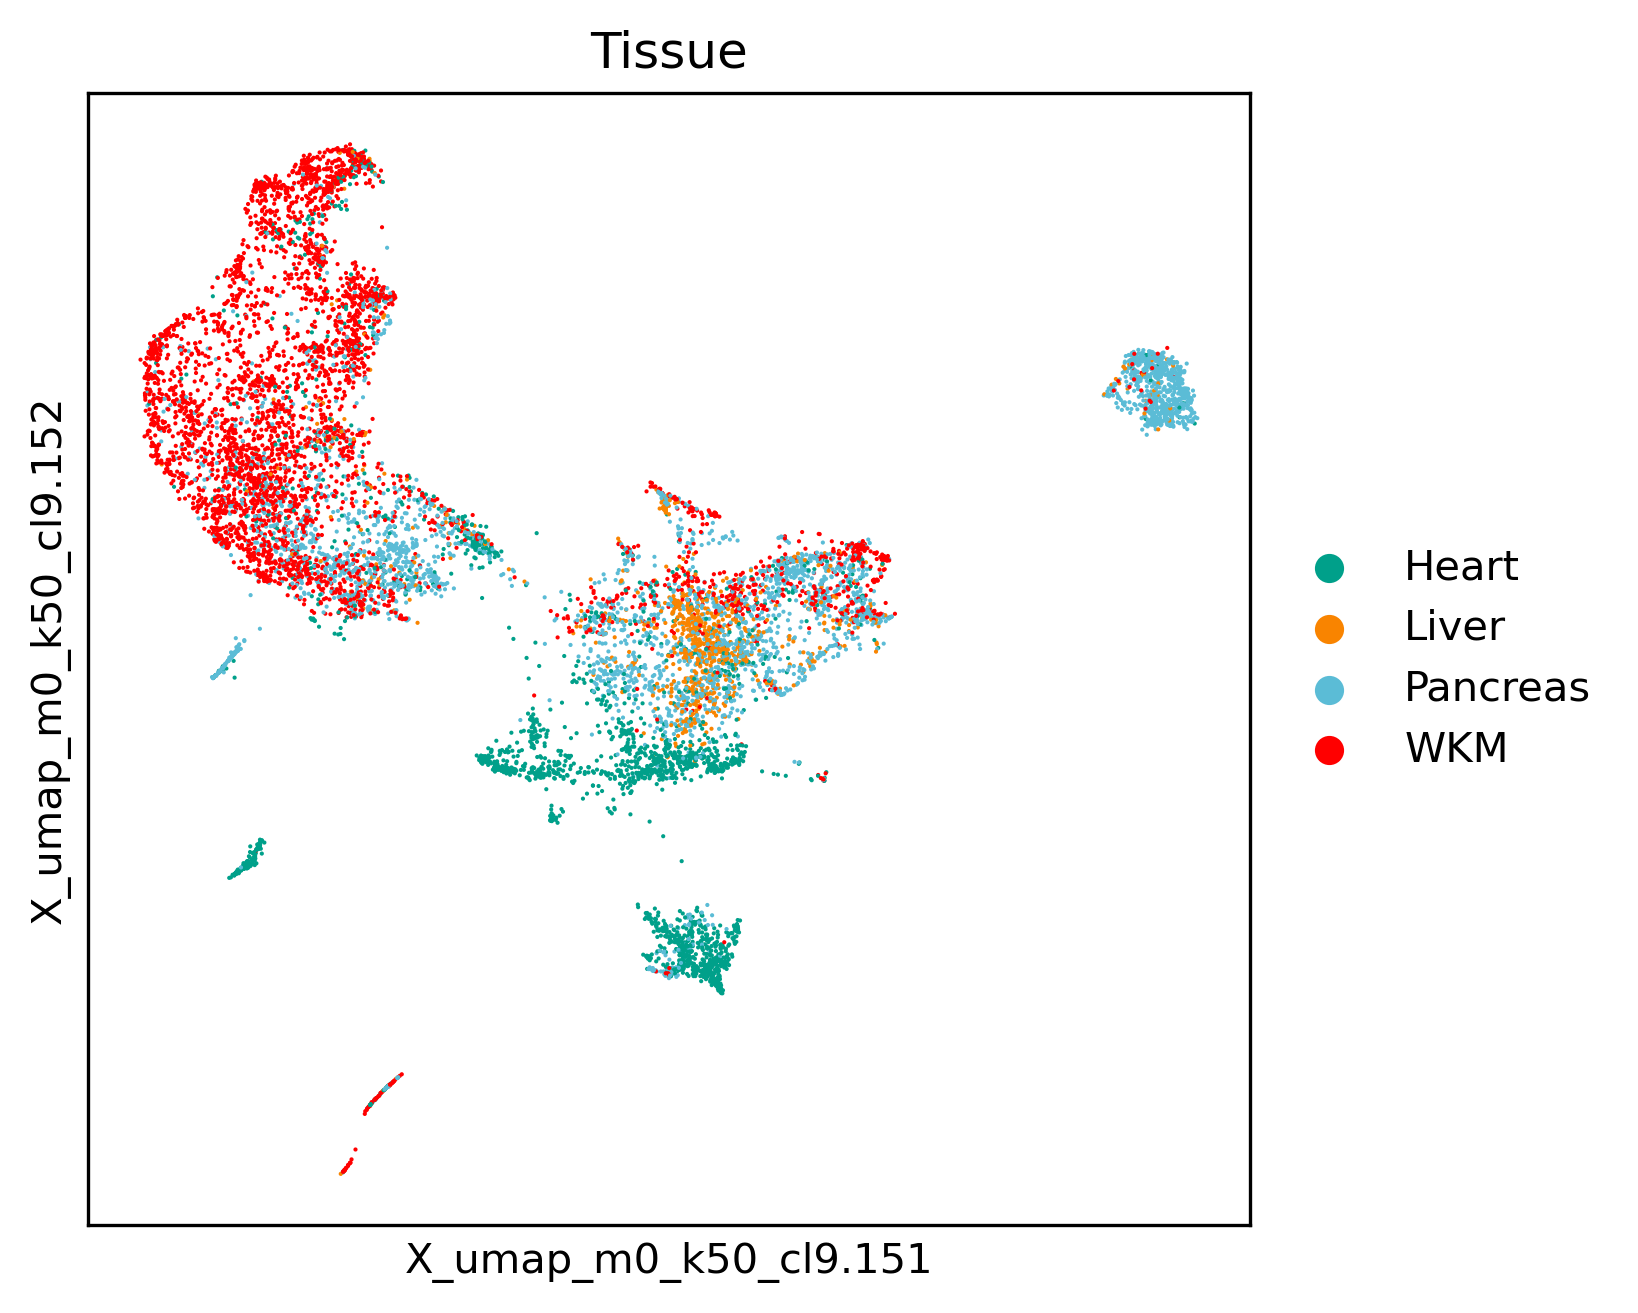

In [5]:
colors = {'Heart': '#00A08A', 'Liver': '#F98400', 'Pancreas': '#5BBCD6', 'WKM': '#FF0000'}
fig, ax = plt.subplots(figsize=(5,5))
sc.pl.embedding(adata, basis='X_umap_m0_k50_cl9.15', ax=ax, color='Tissue', palette=colors, size=4)

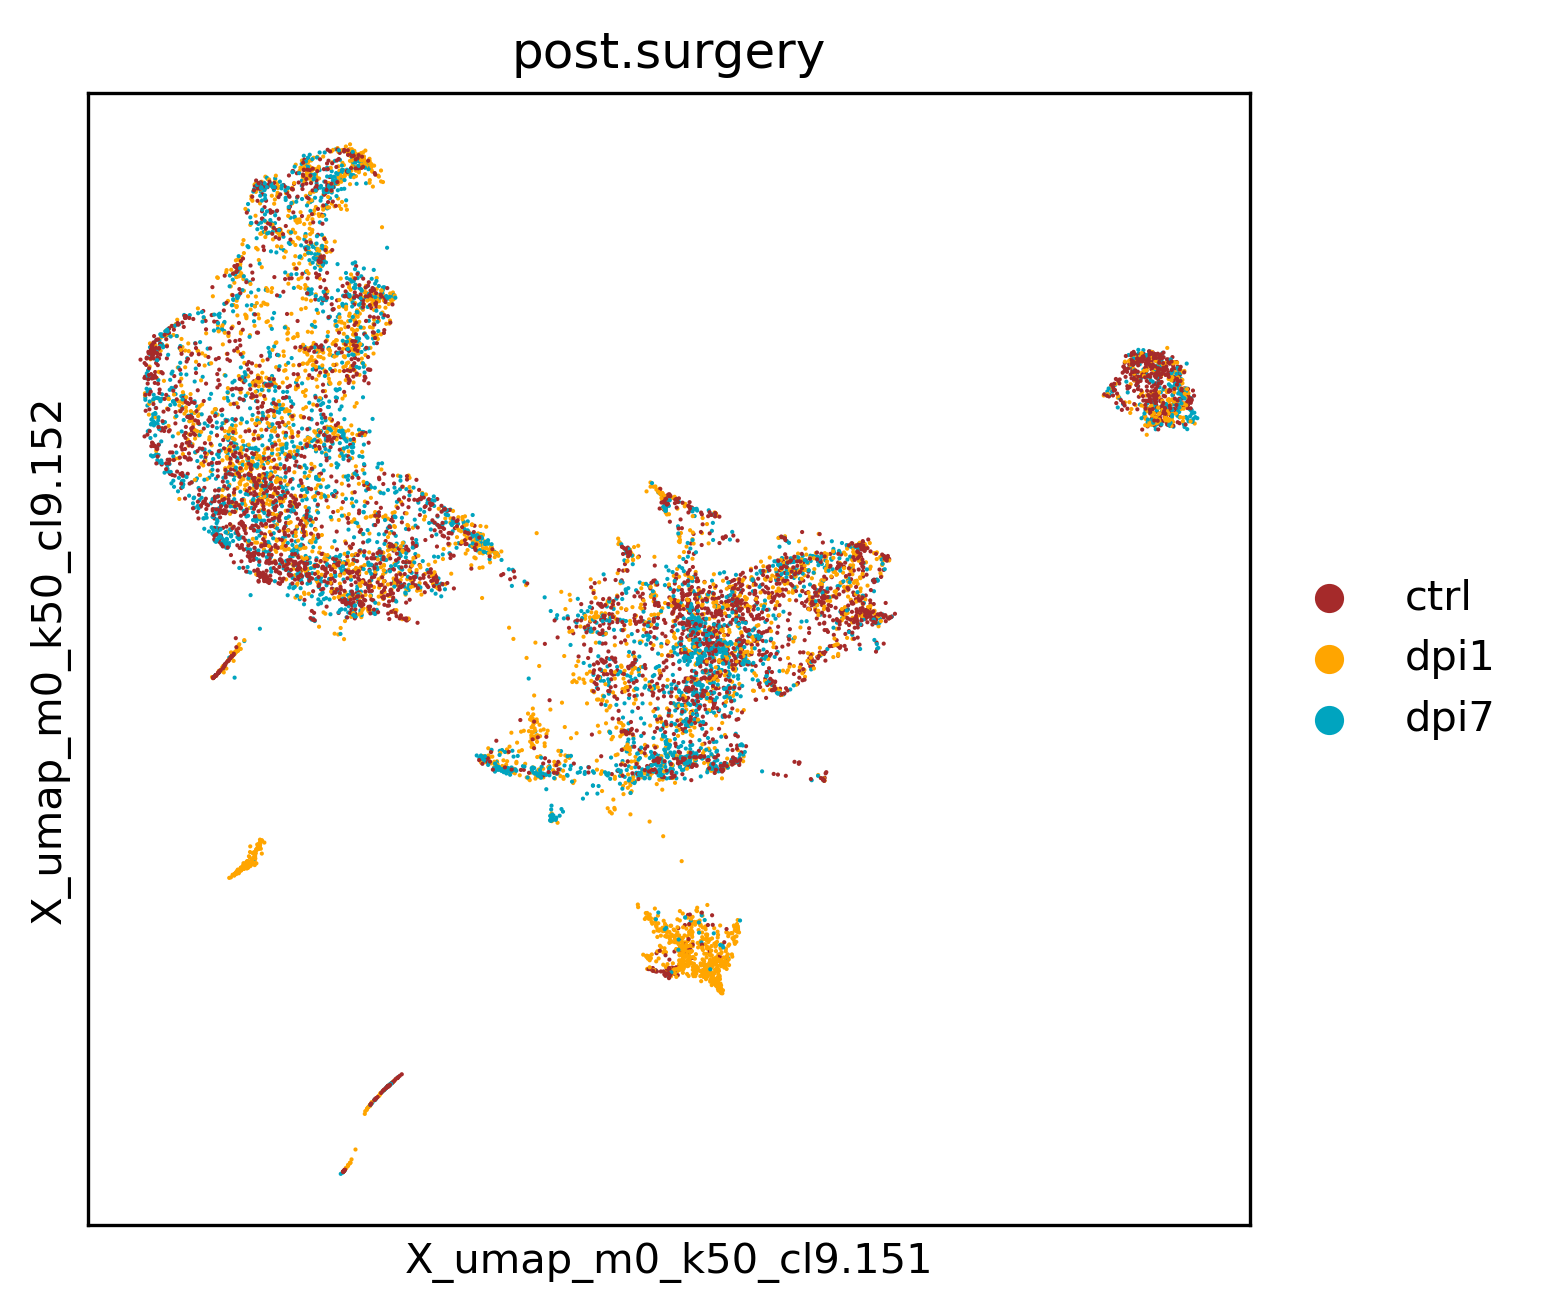

In [6]:
colors = {'ctrl': '#A52A2A', 'dpi1': '#FFA500', 'dpi7': '#00A4BF'}
fig, ax = plt.subplots(figsize=(5,5))
sc.pl.embedding(adata, basis='X_umap_m0_k50_cl9.15', ax=ax, color='post.surgery', palette=colors, size=4)

['7', '6', '5', '4', '3', '2', '1']


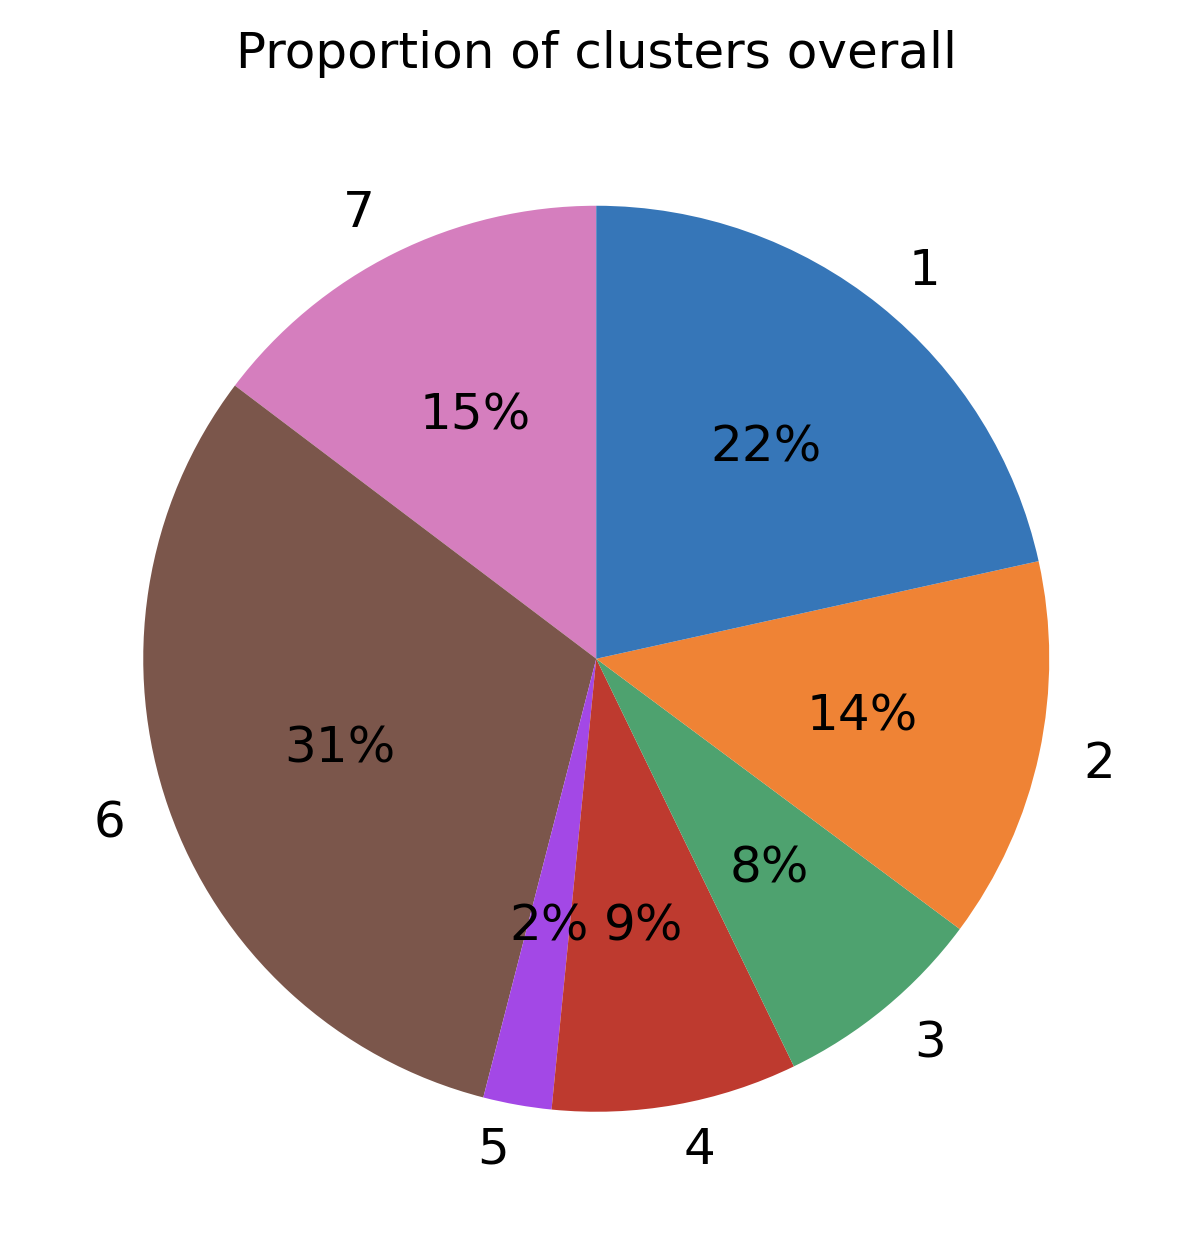

In [7]:
cluster_counts = adata.obs['M0_k50_cl9.15k50'].value_counts()
cluster_counts = cluster_counts.iloc[1:]
sorted_names = cluster_counts.index
sorted_names = sorted(sorted_names, reverse=True)
print(sorted_names)
sorted_counts = [cluster_counts[name] for name in sorted_names]

colors = ['#D57EBE', '#7B564B', '#A348E6', '#BE3A2F', '#4EA26F', '#EF8335', '#3676B8']

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(sorted_counts, autopct='%1.0f%%', labels=sorted_names, colors=colors, startangle=90, textprops={'fontsize': 12})
ax.set_title('Proportion of clusters overall')
plt.show()

Tissue                Heart      Liver   Pancreas        WKM
M0_k50_cl9.15k50                                            
1                  4.724751   1.430429  16.384915  77.459905
2                  9.452055   1.986301   5.958904  82.602740
3                  1.466993   3.300733  91.809291   3.422983
4                 90.405117   0.106610   8.742004   0.746269
5                 63.218391   8.812261  10.727969  17.241379
6                 22.411221  20.561027  40.943002  16.084751
7                 16.454892   4.701398  47.839898  31.003812


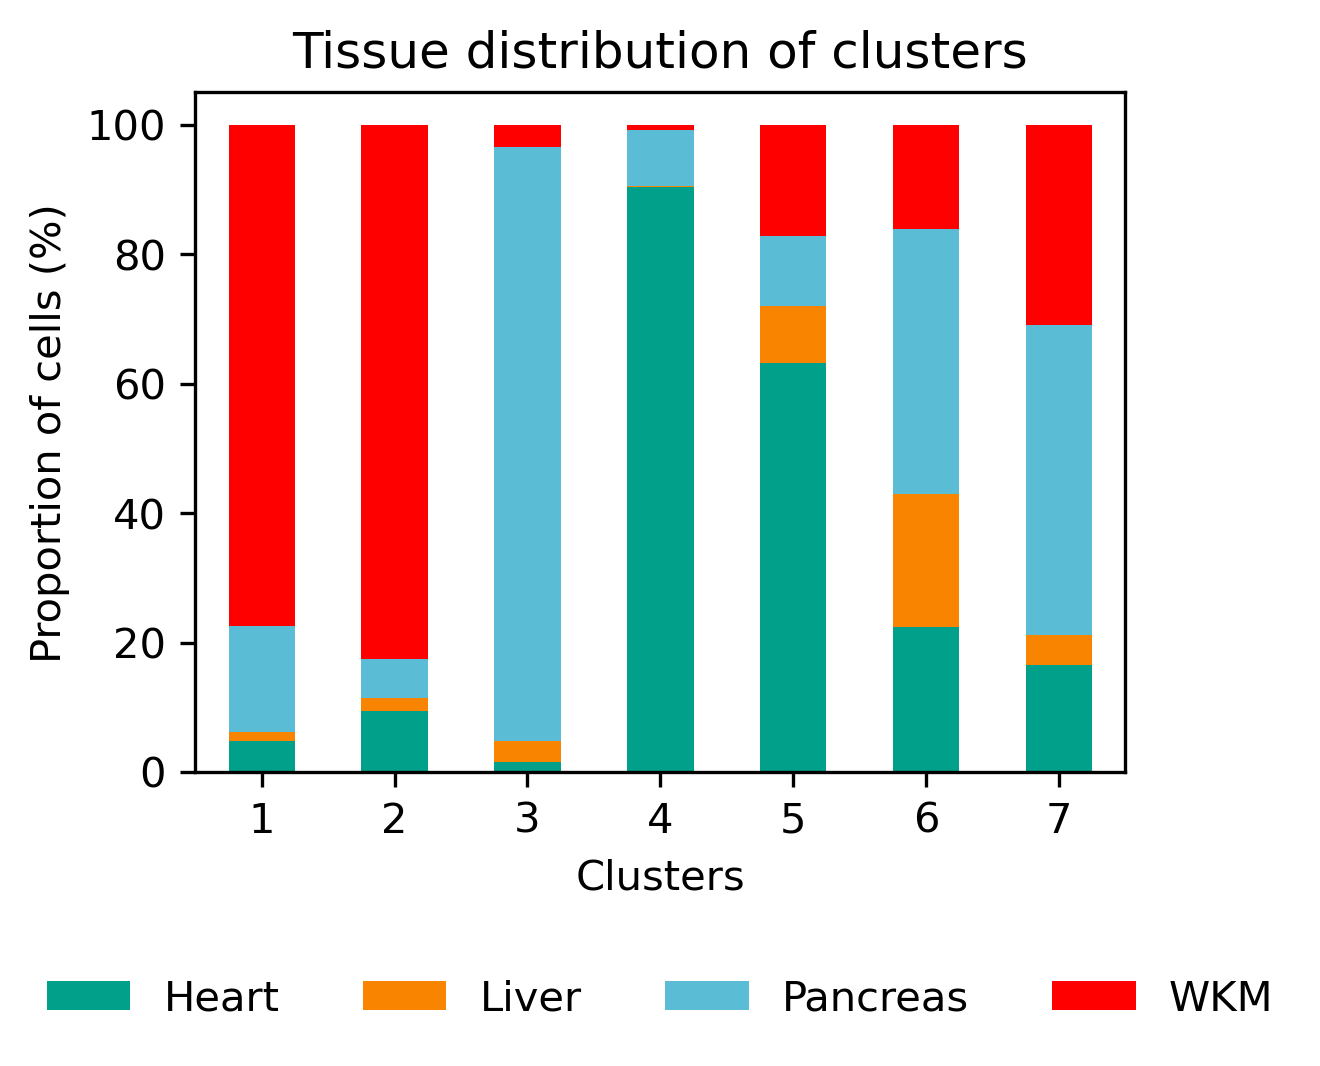

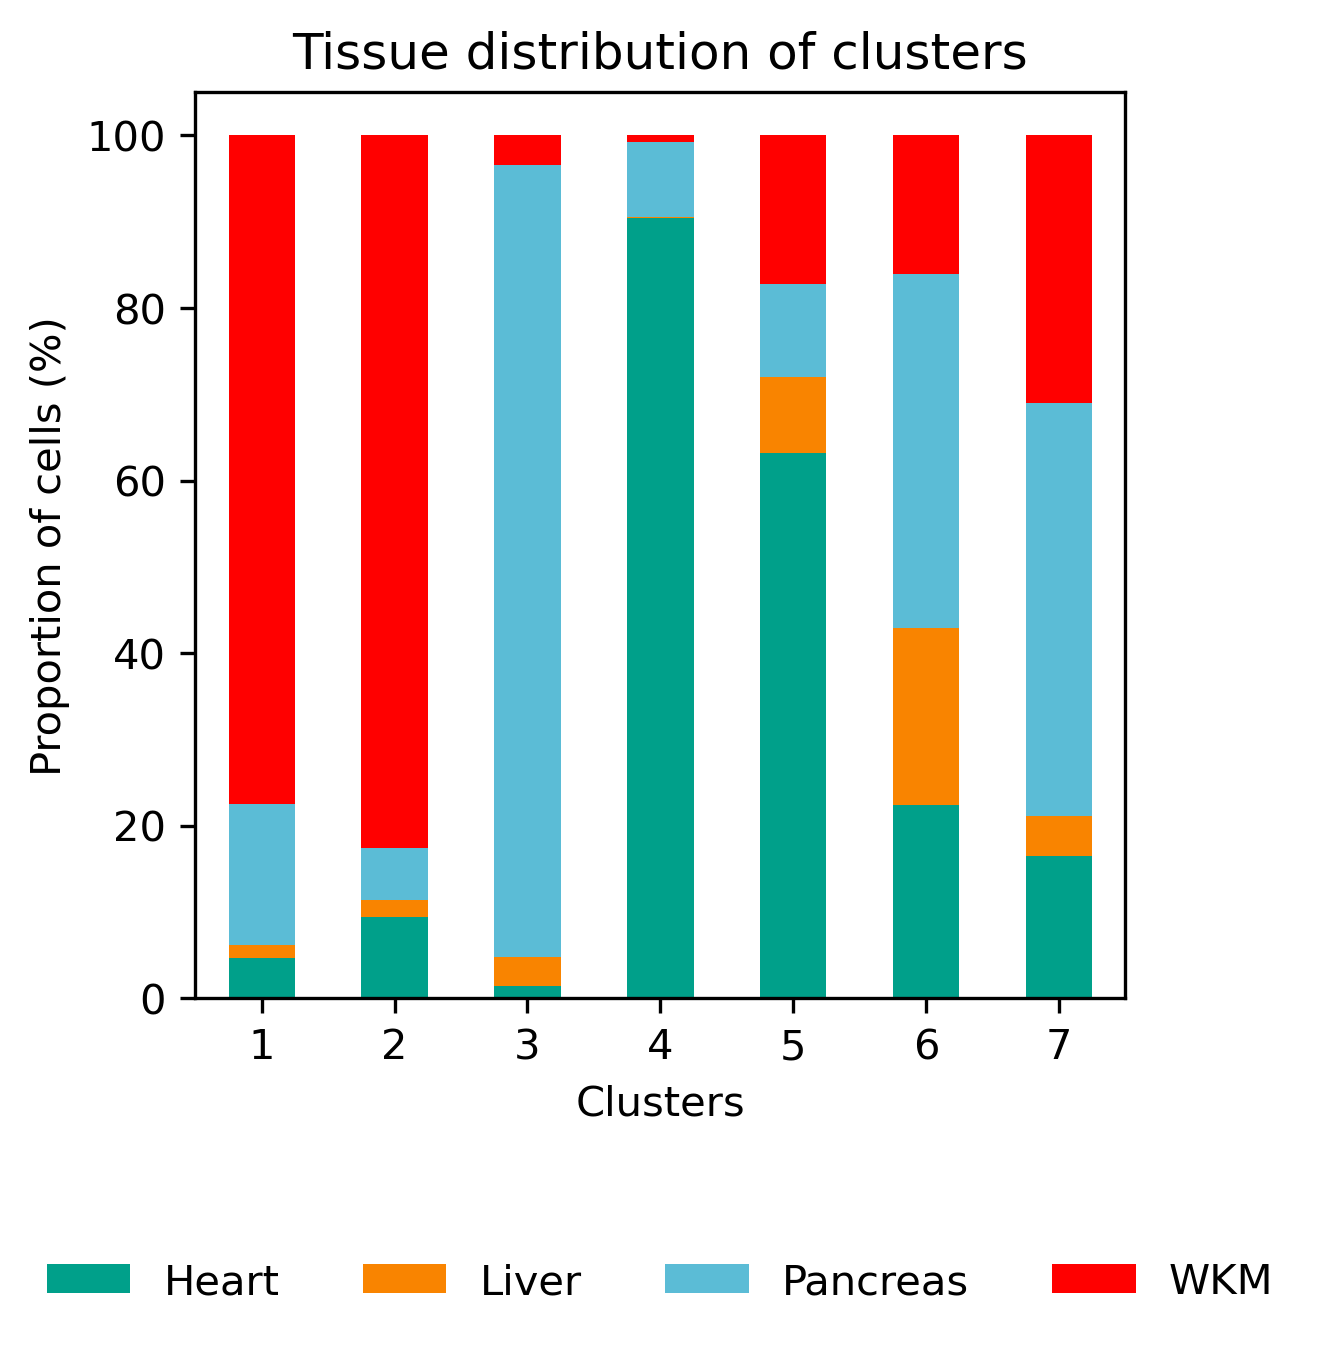

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract cluster labels and tissue annotations as separate arrays
clusters = adata.obs['M0_k50_cl9.15k50']
tissues = adata.obs['Tissue']

# Create a contingency table of tissue counts in each cluster
contingency = pd.crosstab(clusters,tissues)
#contingency = contingency.iloc[1:]

# Get proportions
proportions = contingency.div(contingency.sum(axis=1), axis=0) * 100
if 'NA' in proportions.index:
    proportions = proportions.iloc[:-1, :]

print(proportions)

colors = {'Heart': '#00A08A', 'Liver': '#F98400', 'Pancreas': '#5BBCD6', 'WKM': '#FF0000'}


# Plot a stacked barplot of the proportions
fig, ax = plt.subplots(figsize=(4, 3))
proportions.plot(kind='bar', stacked=True, legend=False, ax=ax, color=colors)
plt.xticks(rotation=0, horizontalalignment="center")
ax.set_xlabel('Clusters')
ax.set_ylabel('Proportion of cells (%)')
ax.set_title('Tissue distribution of clusters')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=4, frameon=False)
#plt.savefig("bar_cluster_vs_tissue_4x3.pdf", bbox_inches="tight")


fig, ax = plt.subplots(figsize=(4, 4))
proportions.plot(kind='bar', stacked=True, legend=False, ax=ax, color=colors)
plt.xticks(rotation=0, horizontalalignment="center")
ax.set_xlabel('Clusters')
ax.set_ylabel('Proportion of cells (%)')
ax.set_title('Tissue distribution of clusters')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=4, frameon=False)
#plt.savefig("bar_cluster_vs_tissue_4x4.pdf", bbox_inches="tight")
